In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.def_functions as op
%matplotlib inline

In [2]:
# Importamos nuestro archivo de ánalisis.

nba=pd.read_csv("./output/basket_functions.csv")

In [3]:
# Comprobamos que se trata del archivo correcto.

display(nba)

,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,1PA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,NBA,2018 - 2019,Regular_Season,James Harden,HOU,78,2866.7,843,1909,378,...,858,387,244,66,452,518,586,158,58,2818
1,NBA,2018 - 2019,Regular_Season,Paul George,OKC,77,2841.4,707,1614,292,...,540,205,214,105,523,628,318,170,34,2159
2,NBA,2018 - 2019,Regular_Season,Kemba Walker,CHA,82,2862.6,731,1684,260,...,450,211,131,52,309,361,484,102,34,2102
3,NBA,2018 - 2019,Regular_Season,Bradley Beal,WAS,82,3027.8,764,1609,209,...,448,224,226,89,322,411,448,121,58,2099
4,NBA,2018 - 2019,Regular_Season,Damian Lillard,POR,80,2837.9,681,1533,237,...,513,212,148,68,303,371,551,88,34,2067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,NBA,2018 - 2019,Regular_Season,Sindarius Thornwell,LAC,64,313.1,17,49,3,...,34,20,41,5,39,44,18,14,7,62
288,NBA,2018 - 2019,Regular_Season,Luc Mbah a Moute,LAC,4,61.0,8,18,2,...,5,2,8,2,5,7,2,1,1,20
289,NBA,2018 - 2019,Regular_Season,Tyler Ulis,CHI,1,0.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290,NBA,2018 - 2019,Regular_Season,John Holland,CLE,1,0.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
"""En esta celda, la llamada a la función "compare(P1,P2)", nos devuelve una comparativa
entre las estadísticas de cada uno de los jugadores elegidos"""

P1=nba[nba["Player"]==input("Introduce Player 1: ")]
P2=nba[nba["Player"]==input("Introduce Player 2: ")] 
op.compare(P1, P2)

Introduce Player 1: LeBron James
Introduce Player 2: Marc Gasol


{'Game played': (27    55
  Name: GP, dtype: int64,
  71    79
  Name: GP, dtype: int64),
 'Minutes played': (27    1937.4
  Name: MIN, dtype: float64,
  71    2436.1
  Name: MIN, dtype: float64),
 '2 points made': (27    558
  Name: 2PM, dtype: int64,
  71    390
  Name: 2PM, dtype: int64),
 '2 points attemps': (27    1095
  Name: 2PA, dtype: int64,
  71    870
  Name: 2PA, dtype: int64),
 '3 points made': (27    111
  Name: 3PM, dtype: int64,
  71    99
  Name: 3PM, dtype: int64),
 '3 points attemps': (27    327
  Name: 3PA, dtype: int64,
  71    273
  Name: 3PA, dtype: int64),
 '1 points made': (27    278
  Name: 1PM, dtype: int64,
  71    192
  Name: 1PM, dtype: int64),
 '1 points attemps': (27    418
  Name: 1PA, dtype: int64,
  71    253
  Name: 1PA, dtype: int64),
 'Turnovers': (27    197
  Name: TOV, dtype: int64,
  71    155
  Name: TOV, dtype: int64),
 'Personal foults': (27    94
  Name: PF, dtype: int64,
  71    217
  Name: PF, dtype: int64),
 'Offensive Rebounds': (27    5

Choose Player: LeBron James


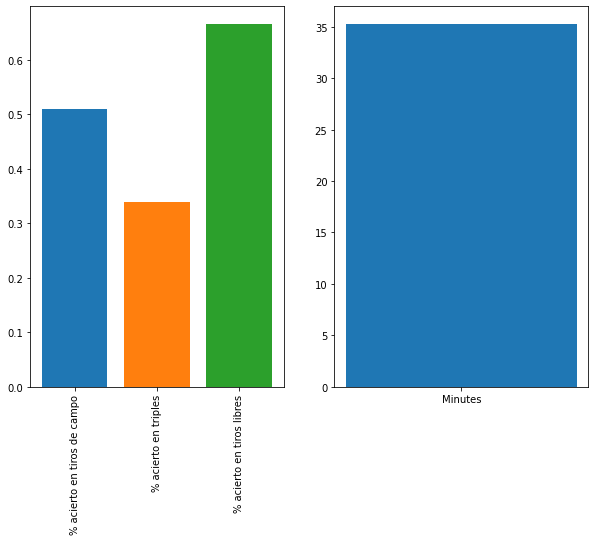

In [5]:
"""En esta celda, la llamada a la función "percentage(Player)", nos devuelve la precisión de cada jugador
en tiros libres, tiros de campo(2 puntos) y triples, asi como los minutos por partido que han disputado.
En función del jugador que introducimos, se nos generan dos diagramas de barras de matplotlib"""

Player=nba[nba["Player"]==input("Choose Player: ")]
stats=op.percentage(Player)
names = list(stats.keys())
values = list(stats.values())
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.xticks(np.arange(3),('% acierto en tiros de campo', "% acierto en triples", "% acierto en tiros libres"), rotation=90)
plt.subplot(1,2,2)
plt.bar(3,values[3],tick_label=names[3])
plt.show()

Choose stat: 3PM


,3PM
count,292.000000
mean,81.160959
std,65.305137
min,0.000000
25%,31.750000
50%,72.000000
75%,119.000000
max,378.000000


Text(0.5, 0, 'quantity')

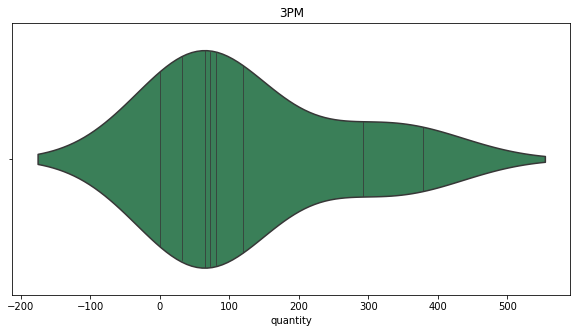

In [6]:
"""En esta celda, la llamada a la función "describe(stat)", nos devuelve la descripción estadística
de la "stat" seleccionada.
En función de la stat introducida, se genera un diagrama de violín diferente"""

stat=(input("Choose stat: "))
op.describe(stat)
display(op.describe(stat))
plt.figure(figsize=(10,5))
sns.violinplot(op.describe(stat), inner=("stick"), color="seagreen")
plt.title(stat)
plt.xlabel("quantity")

In [7]:
# Las siguiente funciones se eligen en base a un equipo, dejo a continuación un diccionario con los nonbres.
# El diccionario incluye el acrónimo como key y el nombre del equipo como value.

nba_dict={"LAC": "LA Clippers",
          "MIL": "Milwaukee Bucks",
          "POR": "Portland Trail Blazers",
          "GSW": "Golden State Warriors",
          "CHA": "Charlotte Hornets",
          "LAL": "LA Lakers",
          "IND": "Indiana Pacers",
          "SAS": "San Antonio Spurs",
          "TOR": "Toronto Raptors",
          "DAL": "Dalas Mavericks",
          "SAC": "Sacaramento Kings",
          "PHI": "Philadelphia 76ers",
          "MIN": "Minnesota Timberwolves",
          "OKC": "Oklahoma City Thunder",
          "NOP": "New Orleans Pelicans",
          "CHI": "Chicago Bulls",
          "PHX": "Phoenix Suns",
          "HOU": "Houston Rockets",
          "ORL": "Orlando Magic",
          "UTA": "Utah Jazz",
          "BRK": "Brooklyn Nets",
          "BOS": "Boston Celtics",
          "DEN": "Denver Nuggets",
          "CLE": "Cleveland Cavaliers",
          "DET": "Detroit Pistons",
          "MEM": "Memphis Grizzlies",
          "ATL": "Atlanta Hawks",
          "NYK": "New York Knicks",
          "MIA": "Miami Heat",
          "WAS": "Washington Wizards"}

In [9]:
"""En esta celda, la llamada a la función "choose_team(team)", nos devuelve un data frame con unicamente
los datos pertenecientes al equipo en cuestión."""

team=input("choose team: ")
op.choose_team(team)

choose team: LAL


,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,1PA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
27,NBA,2018 - 2019,Regular_Season,LeBron James,LAL,55,1937.4,558,1095,111,...,418,197,94,57,408,465,454,72,33,1505
47,NBA,2018 - 2019,Regular_Season,Kyle Kuzma,LAL,70,2313.6,496,1087,128,...,250,133,170,60,322,382,178,41,26,1308
88,NBA,2018 - 2019,Regular_Season,Brandon Ingram,LAL,52,1760.5,362,729,31,...,289,129,149,41,226,267,154,28,31,950
92,NBA,2018 - 2019,Regular_Season,Kentavious Caldwell-Pope,LAL,82,2035.0,325,756,151,...,158,65,137,48,190,238,110,73,13,938
103,NBA,2018 - 2019,Regular_Season,JaVale McGee,LAL,75,1670.8,400,641,1,...,152,108,208,195,371,566,52,47,148,897
141,NBA,2018 - 2019,Regular_Season,Reggie Bullock,LAL,63,1878.9,245,594,148,...,85,65,109,22,151,173,129,40,12,711
196,NBA,2018 - 2019,Regular_Season,Josh Hart,LAL,67,1714.8,189,464,92,...,80,58,147,35,213,248,93,64,40,525
209,NBA,2018 - 2019,Regular_Season,Lance Stephenson,LAL,68,1122.7,184,432,73,...,73,86,111,32,183,215,140,41,7,491
220,NBA,2018 - 2019,Regular_Season,Lonzo Ball,LAL,47,1422.6,185,456,75,...,48,103,114,54,197,251,255,69,19,465
231,NBA,2018 - 2019,Regular_Season,Mike Muscala,LAL,64,1305.9,145,361,89,...,85,48,130,57,187,244,76,22,38,449


choose stat: PTS


,PTS
Team,
ATL,7039
BOS,8389
BRK,7333
CHA,8320
CHI,5432
CLE,5743
DAL,7343
DEN,7643
DET,6665


Text(0.5, 0, 'quantity')

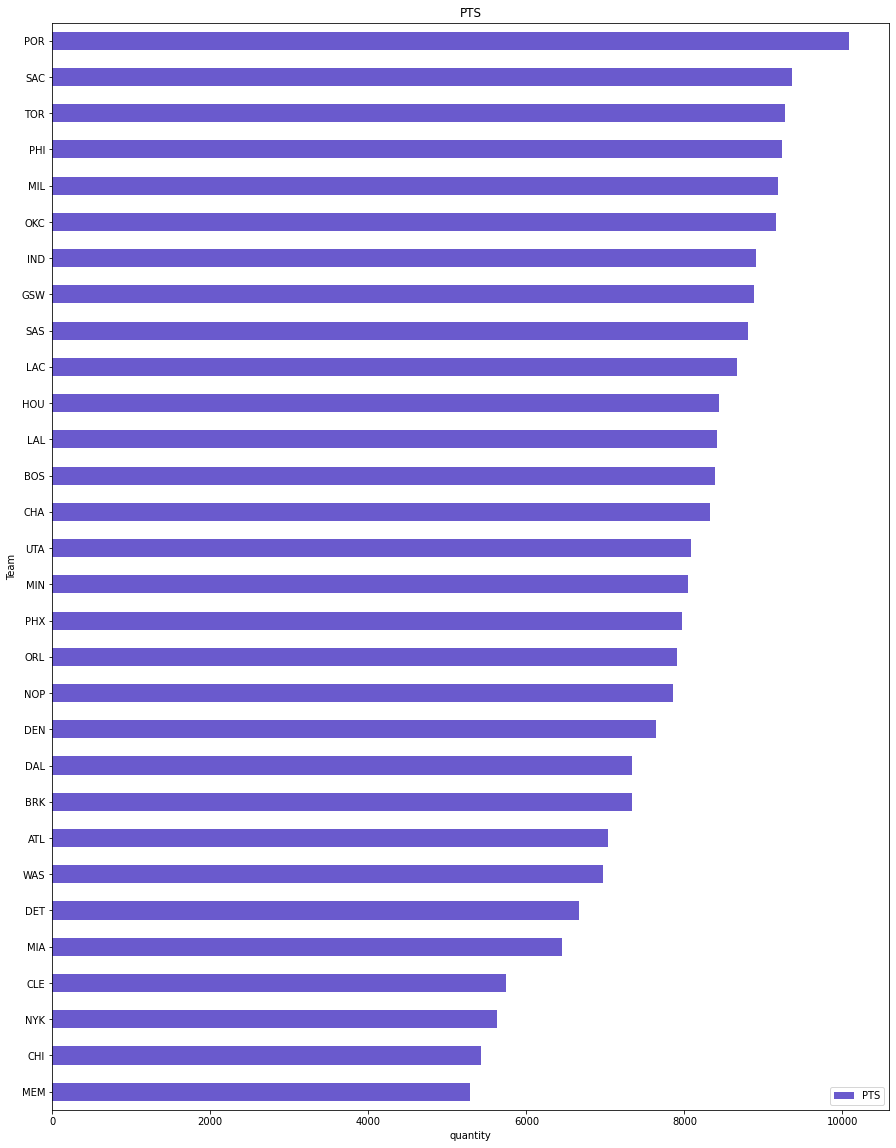

In [11]:
"""En esta celda, la llamada a la función "team_stats(stat)", nos devuelve un dataframe con la suma 
de los valores de la estadística que queremos consultar, agrupada por equipo.
También nos devuelve un diagrama de barras en horizontal, para que de un simple vistazo podamos conocer
quienes son los mejores o peores equipos en dicha estadística""" 

stat=input("choose stat: ")
display(op.team_stats(stat))
chosen_stat=stat
op.team_stats(stat).sort_values(by=chosen_stat, ascending=True).plot.barh(figsize=(15,20), color="slateblue")
plt.title(chosen_stat)
plt.xlabel("quantity")